In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats as sms
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
sns.set_style('darkgrid')
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_pickle('ufc_total_saved.pkl')

In [3]:
df.head()

,newindex,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,...,B_age,R_age,last_round,last_round_time,Format,Fight_type,time_so_far,round_time_delta,TIME,TIMEmod
0,Aaron PhillipsMatt Hobar2014-08-23,Aaron Phillips,Matt Hobar,Kevin Nix,2014-08-23,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,3,...,27.0,25.0,3,5:00,3 Rnd (5-5-5),Bantamweight Bout,00:10:00,00:05:00,00:15:00,900
1,Aaron RileyJoe Brammer2010-05-29,Aaron Riley,Joe Brammer,Steve Mazzagatti,2010-05-29,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,...,26.0,29.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
2,Aaron RileyJorge Gurgel2008-11-15,Aaron Riley,Jorge Gurgel,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,...,31.0,27.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
3,Aaron RileyJustin Salas2013-07-27,Aaron Riley,Justin Salas,Randy Corley,2013-07-27,"Seattle, Washington, USA",Blue,False,Lightweight,3,...,31.0,32.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
4,Aaron RileyShane Nelson2009-08-08,Aaron Riley,Shane Nelson,Kevin Mulhall,2009-08-08,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,3,...,24.0,28.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900


In [4]:
non_title_df = df.loc[df.title_bout==False]

In [5]:
non_title_df.head()

,newindex,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,...,B_age,R_age,last_round,last_round_time,Format,Fight_type,time_so_far,round_time_delta,TIME,TIMEmod
0,Aaron PhillipsMatt Hobar2014-08-23,Aaron Phillips,Matt Hobar,Kevin Nix,2014-08-23,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,3,...,27.0,25.0,3,5:00,3 Rnd (5-5-5),Bantamweight Bout,00:10:00,00:05:00,00:15:00,900
1,Aaron RileyJoe Brammer2010-05-29,Aaron Riley,Joe Brammer,Steve Mazzagatti,2010-05-29,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,...,26.0,29.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
2,Aaron RileyJorge Gurgel2008-11-15,Aaron Riley,Jorge Gurgel,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,...,31.0,27.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
3,Aaron RileyJustin Salas2013-07-27,Aaron Riley,Justin Salas,Randy Corley,2013-07-27,"Seattle, Washington, USA",Blue,False,Lightweight,3,...,31.0,32.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900
4,Aaron RileyShane Nelson2009-08-08,Aaron Riley,Shane Nelson,Kevin Mulhall,2009-08-08,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,3,...,24.0,28.0,3,5:00,3 Rnd (5-5-5),Lightweight Bout,00:10:00,00:05:00,00:15:00,900


In [6]:
for col in non_title_df.columns:
    print (col)

newindex
R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_longest_win_streak
B_losses
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B

In [7]:
non_title_df['B_total_time_fought(seconds)']

0       167.00
1       216.00
2       898.00
3       483.00
4       472.00
         ...  
5141       NaN
5142     72.00
5143    721.00
5144    880.50
5145    690.75
Name: B_total_time_fought(seconds), Length: 4810, dtype: float64

In [8]:
for i, col in enumerate(df.columns):
    print (i, col)

0 newindex
1 R_fighter
2 B_fighter
3 Referee
4 date
5 location
6 Winner
7 title_bout
8 weight_class
9 no_of_rounds
10 B_current_lose_streak
11 B_current_win_streak
12 B_draw
13 B_avg_BODY_att
14 B_avg_BODY_landed
15 B_avg_CLINCH_att
16 B_avg_CLINCH_landed
17 B_avg_DISTANCE_att
18 B_avg_DISTANCE_landed
19 B_avg_GROUND_att
20 B_avg_GROUND_landed
21 B_avg_HEAD_att
22 B_avg_HEAD_landed
23 B_avg_KD
24 B_avg_LEG_att
25 B_avg_LEG_landed
26 B_avg_PASS
27 B_avg_REV
28 B_avg_SIG_STR_att
29 B_avg_SIG_STR_landed
30 B_avg_SIG_STR_pct
31 B_avg_SUB_ATT
32 B_avg_TD_att
33 B_avg_TD_landed
34 B_avg_TD_pct
35 B_avg_TOTAL_STR_att
36 B_avg_TOTAL_STR_landed
37 B_longest_win_streak
38 B_losses
39 B_avg_opp_BODY_att
40 B_avg_opp_BODY_landed
41 B_avg_opp_CLINCH_att
42 B_avg_opp_CLINCH_landed
43 B_avg_opp_DISTANCE_att
44 B_avg_opp_DISTANCE_landed
45 B_avg_opp_GROUND_att
46 B_avg_opp_GROUND_landed
47 B_avg_opp_HEAD_att
48 B_avg_opp_HEAD_landed
49 B_avg_opp_KD
50 B_avg_opp_LEG_att
51 B_avg_opp_LEG_landed
52 B_avg

In [9]:
numer_df = pd.concat([df[df.columns[1:13]], 
                      df[df.columns[37:39]], 
                         df[df.columns[66:80]], 
                         df[df.columns[104:106]], 
                         df[df.columns[132:146]], 
                      df[df.columns[153]] ], axis=1)

In [10]:
numer_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,TIMEmod
0,Aaron Phillips,Matt Hobar,Kevin Nix,2014-08-23,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,3,1.0,...,0.0,0.0,0.0,Southpaw,175.26,177.80,135.0,27.0,25.0,900
1,Aaron Riley,Joe Brammer,Steve Mazzagatti,2010-05-29,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,0.0,0.0,2.0,Southpaw,172.72,175.26,155.0,26.0,29.0,900
2,Aaron Riley,Jorge Gurgel,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,Southpaw,172.72,175.26,155.0,31.0,27.0,900
3,Aaron Riley,Justin Salas,Randy Corley,2013-07-27,"Seattle, Washington, USA",Blue,False,Lightweight,3,1.0,...,0.0,0.0,3.0,Southpaw,172.72,175.26,155.0,31.0,32.0,900
4,Aaron Riley,Shane Nelson,Kevin Mulhall,2009-08-08,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,3,0.0,...,0.0,0.0,1.0,Southpaw,172.72,175.26,155.0,24.0,28.0,900


In [11]:
numer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5146 entries, 0 to 5145
Data columns (total 45 columns):
R_fighter                       5146 non-null object
B_fighter                       5146 non-null object
Referee                         5123 non-null object
date                            5146 non-null datetime64[ns]
location                        5146 non-null object
Winner                          5146 non-null object
title_bout                      5146 non-null bool
weight_class                    5146 non-null object
no_of_rounds                    5146 non-null int64
B_current_lose_streak           5146 non-null float64
B_current_win_streak            5146 non-null float64
B_draw                          5146 non-null float64
B_longest_win_streak            5146 non-null float64
B_losses                        5146 non-null float64
B_win_by_Decision_Majority      5146 non-null float64
B_win_by_Decision_Split         5146 non-null float64
B_win_by_Decision_Unanimous     5

In [12]:
numer_df.B_wins.value_counts()

0.0     1815
1.0      933
2.0      612
3.0      462
4.0      327
5.0      214
6.0      204
7.0      140
8.0      114
9.0      101
10.0      47
11.0      41
12.0      37
13.0      28
14.0      25
15.0      17
16.0      15
17.0       7
19.0       3
22.0       1
18.0       1
21.0       1
23.0       1
Name: B_wins, dtype: int64

In [13]:
numer_df.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,TIMEmod
count,5146.000000,5146.000000,5146.000000,5146.0,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,5146.000000,...,5146.000000,5146.000000,5146.000000,5146.000000,5142.000000,4828.000000,5143.000000,4972.000000,5082.000000,5146.000000
mean,3.118927,0.429848,0.836961,0.0,1.587835,1.463272,0.016906,0.212204,0.779829,0.872328,...,1.254372,0.777303,0.071318,3.596774,179.275492,183.664412,172.080887,29.171963,29.441755,611.665177
std,0.631720,0.731251,1.306053,0.0,1.785418,1.866151,0.130432,0.526513,1.300037,1.545747,...,1.800876,1.325887,0.277720,3.709476,8.637590,10.304375,35.158159,4.078538,4.141211,360.251197
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000,7.000000
25%,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000,261.000000
50%,3.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,2.000000,180.340000,182.880000,170.000000,29.000000,29.000000,726.500000
75%,3.000000,1.000000,1.000000,0.0,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000,900.000000
max,5.000000,6.000000,13.000000,0.0,16.000000,13.000000,2.000000,5.000000,10.000000,11.000000,...,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000,1500.000000


In [14]:
numer_df.drop(columns=['B_draw', 'R_draw'], inplace=True)

In [15]:
numer_df.TIMEmod.value_counts()

900     2124
1500     137
600       36
480       18
300       18
        ... 
652        1
821        1
644        1
746        1
10         1
Name: TIMEmod, Length: 834, dtype: int64

In [16]:
numer_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,TIMEmod
0,Aaron Phillips,Matt Hobar,Kevin Nix,2014-08-23,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,3,1.0,...,0.0,0.0,0.0,Southpaw,175.26,177.80,135.0,27.0,25.0,900
1,Aaron Riley,Joe Brammer,Steve Mazzagatti,2010-05-29,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,0.0,0.0,2.0,Southpaw,172.72,175.26,155.0,26.0,29.0,900
2,Aaron Riley,Jorge Gurgel,Mario Yamasaki,2008-11-15,"Las Vegas, Nevada, USA",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,Southpaw,172.72,175.26,155.0,31.0,27.0,900
3,Aaron Riley,Justin Salas,Randy Corley,2013-07-27,"Seattle, Washington, USA",Blue,False,Lightweight,3,1.0,...,0.0,0.0,3.0,Southpaw,172.72,175.26,155.0,31.0,32.0,900
4,Aaron Riley,Shane Nelson,Kevin Mulhall,2009-08-08,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,3,0.0,...,0.0,0.0,1.0,Southpaw,172.72,175.26,155.0,24.0,28.0,900


In [17]:
non_num_cols=[]
for col in numer_df.columns:
    if numer_df[col].dtype=='O':
        non_num_cols.append(col)
    elif numer_df[col].dtype=='datetime64[ns]':
        non_num_cols.append(col)
    elif numer_df[col].dtype=='object':
        non_num_cols.append(col)
    elif numer_df[col].dtype=='bool':
        non_num_cols.append(col)
        
    elif col=='TIMEmod':
        non_num_cols.append(col)
        
non_num_cols

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'B_Stance',
 'R_Stance',
 'TIMEmod']

In [18]:
numer_x_df = numer_df.drop(columns=non_num_cols)

In [19]:
numer_df['TIMEmod'].astype('float')


0       900.0
1       900.0
2       900.0
3       900.0
4       900.0
        ...  
5141    900.0
5142    900.0
5143    900.0
5144    261.0
5145    900.0
Name: TIMEmod, Length: 5146, dtype: float64

In [20]:
numer_y_df = numer_df['TIMEmod']

In [21]:
numer_y_df.head()

0    900
1    900
2    900
3    900
4    900
Name: TIMEmod, dtype: int64

In [22]:
numer_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5146 entries, 0 to 5145
Data columns (total 32 columns):
no_of_rounds                    5146 non-null int64
B_current_lose_streak           5146 non-null float64
B_current_win_streak            5146 non-null float64
B_longest_win_streak            5146 non-null float64
B_losses                        5146 non-null float64
B_win_by_Decision_Majority      5146 non-null float64
B_win_by_Decision_Split         5146 non-null float64
B_win_by_Decision_Unanimous     5146 non-null float64
B_win_by_KO/TKO                 5146 non-null float64
B_win_by_Submission             5146 non-null float64
B_win_by_TKO_Doctor_Stoppage    5146 non-null float64
B_wins                          5146 non-null float64
B_Height_cms                    5138 non-null float64
B_Reach_cms                     4478 non-null float64
B_Weight_lbs                    5140 non-null float64
R_current_lose_streak           5146 non-null float64
R_current_win_streak           

In [23]:
numer_x_df.head()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,175.26,177.80,135.0,27.0,25.0
1,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,172.72,175.26,155.0,26.0,29.0
2,3,1.0,0.0,2.0,3.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,172.72,175.26,155.0,31.0,27.0
3,3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,172.72,175.26,155.0,31.0,32.0
4,3,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,172.72,175.26,155.0,24.0,28.0


In [24]:
for col in numer_x_df.columns:    
    numer_x_df.loc[numer_x_df[col].isna()] = numer_x_df[col].mean()
    
# numer_x_df.apply()

In [25]:
numer_x_df.head()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,175.260000,177.800000,135.000000,27.000000,25.000000
1,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,...,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361,183.281361
2,3.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,175.260000,155.000000,31.000000,27.000000
3,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,3.000000,172.720000,175.260000,155.000000,31.000000,32.000000
4,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,172.720000,175.260000,155.000000,24.000000,28.000000


In [26]:
# scaling our data down



In [52]:
from sklearn.preprocessing import StandardScaler



x_train, x_test, y_train, y_test = train_test_split(numer_x_df, numer_y_df, test_size=0.2, random_state=42)
linreg = LinearRegression()



scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


linreg.fit(x_train_scaled, 
           y_train)

linreg.score(x_train_scaled, y_train)

linreg.score(x_test_scaled, y_test)

0.09256780272811804

In [54]:
x_train_scaled

array([[-0.41172686, -0.38443448, -0.4231719 , ...,  0.45934038,
        -0.39316156, -0.42018253],
       [-0.41172686, -0.41572349, -0.37612148, ..., -1.13654482,
        -0.43021668, -0.40160185],
       [ 2.45176119,  2.45162281,  2.45131691, ...,  0.40448538,
         2.44676839,  2.44647022],
       ...,
       [-0.41172686, -0.41572349, -0.4231719 , ...,  0.45934038,
        -0.52285449, -0.49450526],
       [-0.41172686, -0.41572349, -0.4231719 , ..., -0.01942518,
        -0.33757887, -0.34585981],
       [-0.41172686, -0.38443448, -0.4231719 , ..., -0.81736778,
        -0.41168912, -0.43876322]])

In [29]:
numer_mat = numer_df.corr()

In [30]:
(numer_mat >0.7) * (numer_mat<1)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,TIMEmod
title_bout,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
no_of_rounds,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_current_lose_streak,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_current_win_streak,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_longest_win_streak,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
B_losses,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_win_by_Decision_Majority,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_win_by_Decision_Split,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_win_by_Decision_Unanimous,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B_win_by_KO/TKO,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
non_num_cols1 = ['date', 'location', 'title_bout', 'weight_class']

In [32]:
R_cols = []
B_cols = []
for col in numer_df.columns:
    if col[0] =='R':
        R_cols.append(col)
    elif col[0] =='B':
        B_cols.append(col)


numer_B_df = numer_df.drop(columns=R_cols)
numer_R_df = numer_df.drop(columns=B_cols)


numer_B_df.drop(columns=non_num_cols1, inplace=True)
numer_R_df.drop(columns=non_num_cols1, inplace=True)

In [33]:
numer_B_df.head()

,B_fighter,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_longest_win_streak,B_losses,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,TIMEmod
0,Matt Hobar,Blue,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Southpaw,177.80,177.80,135.0,27.0,900
1,Joe Brammer,Red,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Orthodox,172.72,NaN,155.0,26.0,900
2,Jorge Gurgel,Red,3,1.0,0.0,2.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,Orthodox,170.18,175.26,155.0,31.0,900
3,Justin Salas,Blue,3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Southpaw,172.72,177.80,155.0,31.0,900
4,Shane Nelson,Red,3,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,Southpaw,175.26,177.80,155.0,24.0,900


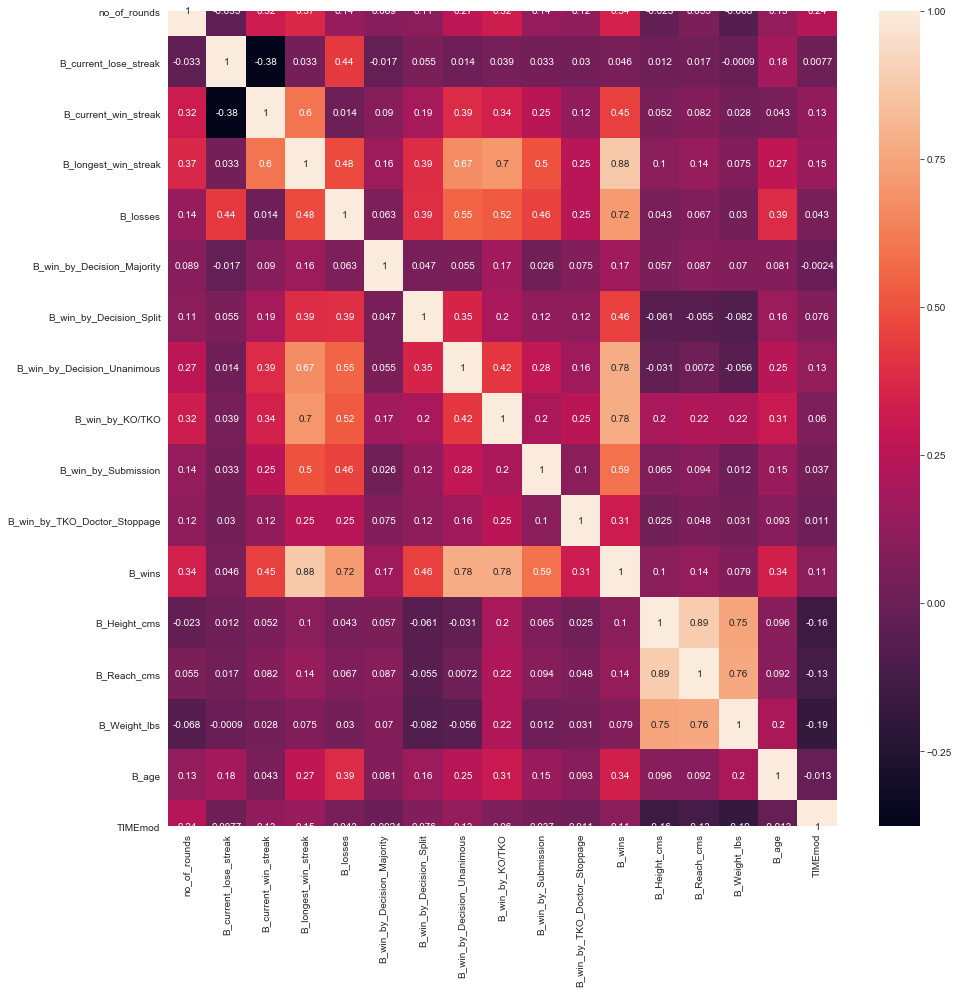

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(numer_B_df.corr(), annot=True)

In [55]:
# attemtping to do some poly reg
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)

In [56]:
reg_poly = LinearRegression()

reg_poly.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
reg_poly.score(x_poly_train, y_train)

0.2427682444108502

In [58]:
from sklearn.metrics import mean_squared_error, r2_score


mean_squared_error(y_train, reg_poly.predict(x_poly_train))

98338.53730035784

In [59]:
r2_score(y_train, reg_poly.predict(x_poly_train))

0.2427682444108502

In [60]:
reg_poly.score(x_poly_test, y_test)

-8321688317994.012

In [61]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Lasso, Ridge



In [62]:
n_splits = 10
crossval = KFold(n_splits, shuffle=True, random_state=31)

score = cross_val_score(reg_poly, x_poly_train, y_train, scoring='r2', cv=crossval)

In [63]:
score

array([-9.00739749e+10, -1.97660880e+11, -1.95422091e+13, -1.34603926e+13,
       -4.81961630e+10, -7.43551136e+12, -2.09712186e+12, -1.21300427e+14,
       -9.97837938e+11, -8.96751882e+12])